In [64]:
import os
import sys
sys.path.append(os.getcwd())

import restools
from comsdk.research import Research

import matplotlib.pyplot as plt
import pickle
import numpy as np
import pandas as pd

In [65]:
from pyESN import ESN, optimal_esn
from skesn.esn import EsnForecaster

In [4]:
Gainsboro   =	'#DCDCDC'
LightGrey   =	'#D3D3D3'
Silver      =	'#C0C0C0'
DarkGray    =	'#A9A9A9'
Gray        =	'#808080'
DimGray     =	'#696969'
Black       =	'#000000'

In [5]:
res = Research.open('RC_MOEHLIS')
task_num = 42

data = []
time = []
n_files = 100

for num_data in range(n_files):
    with open(os.path.join(res.get_task_path(task_num), str(num_data+1)), 'rb') as a:
        b = pickle.load(a)
    data.append(b['timeseries'])
    time.append(b['time'])


Loaded research at C:\Users\ovann\Documents\Researches\2021-04-30-predicting-transition-to-turbulence-using-esn
Number of tasks in the current research: 5059


In [6]:
df_time_len = pd.DataFrame(
    {
        'time_len': [len(i) for i in time],
        'file_name': [i+1 for i in range(n_files)]
    })

df_time_len.sort_values(by=['time_len'], inplace=True)

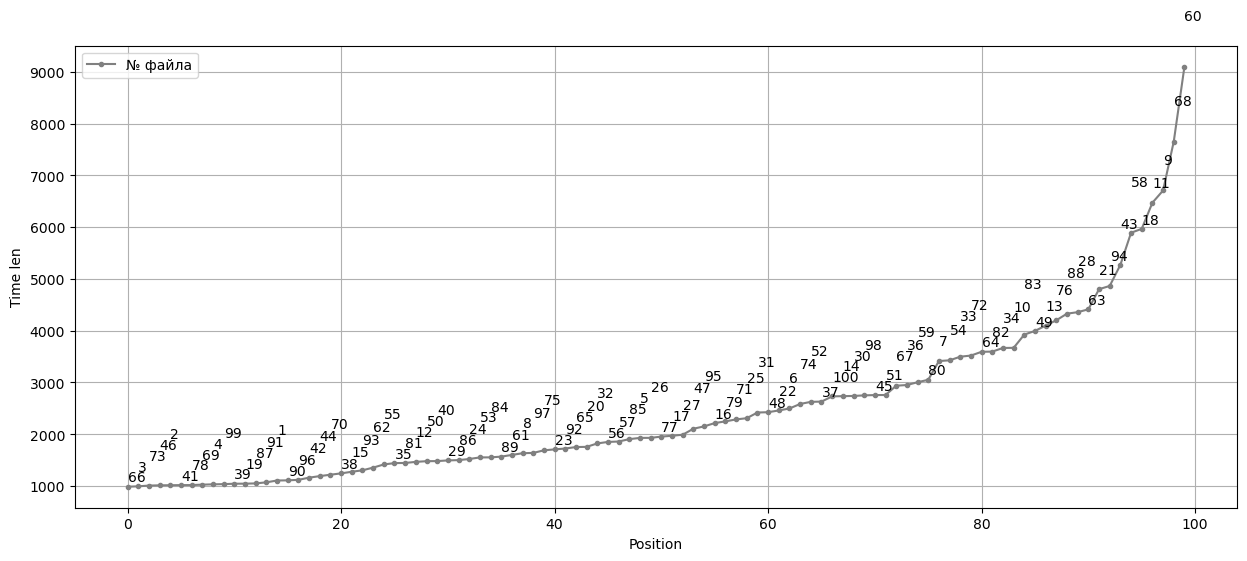

In [7]:
plt.figure(figsize=(15,6))
plt.plot(range(n_files), df_time_len.time_len, '.-', label='№ файла', color=Gray)
for i, j, k in zip(df_time_len.time_len, df_time_len.file_name, range(n_files)):
    plt.text(k, i+100+(k%5)*200, j, fontsize=10.)
plt.grid()
plt.ylabel('Time len')
plt.xlabel('Position')
plt.legend()

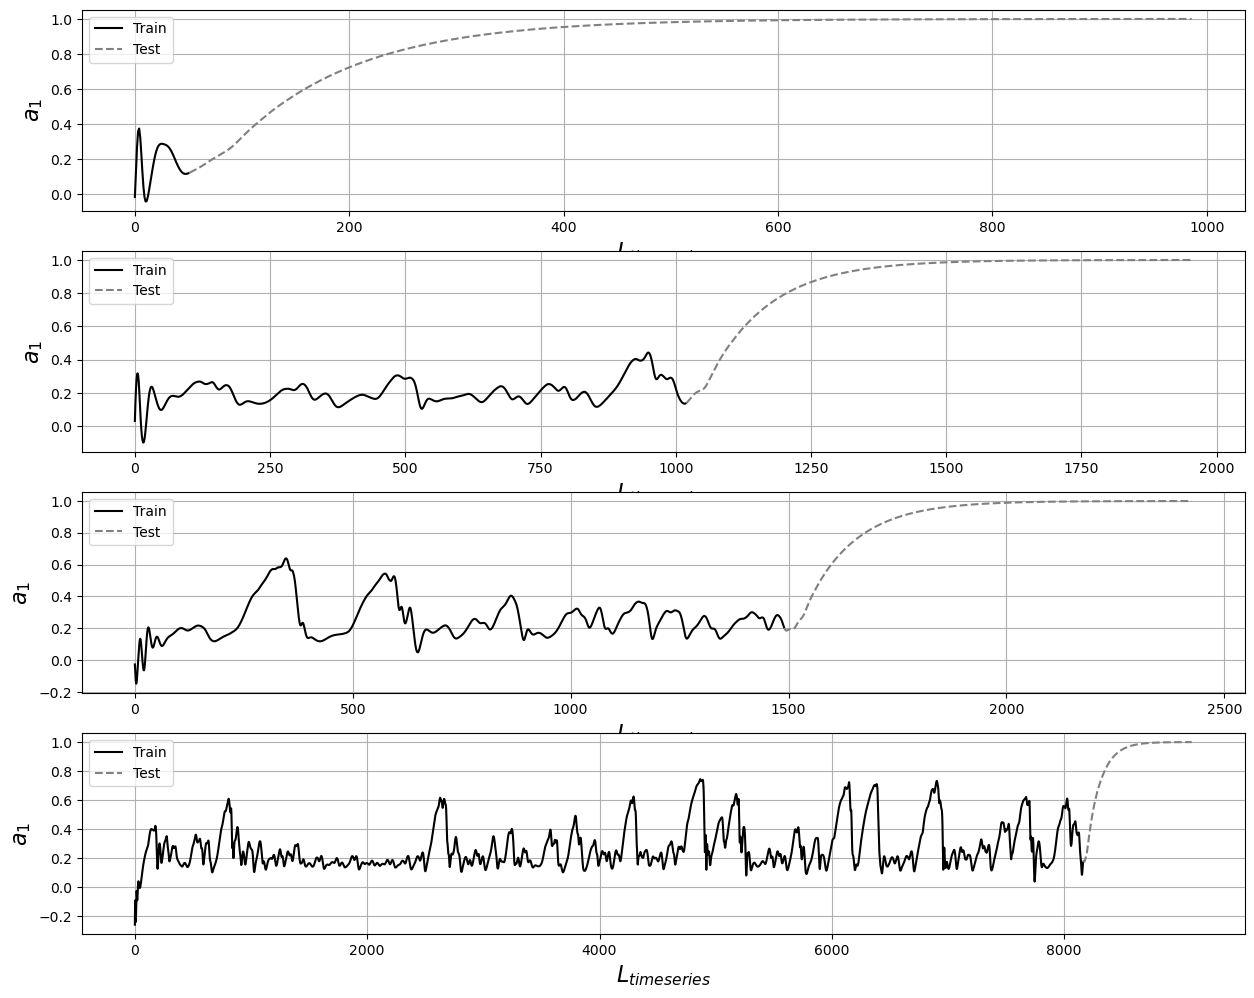

In [30]:
files = [66-1, 77-1, 48-1, 60-1,]
N = len(files)

plt.figure(figsize=(15,3*N))

for i, n in zip(range(N), files):
    datalen = len(time[n])
    trainlen = datalen - 935
    testlen = datalen - trainlen

    training_timeseries = data[n][:trainlen]
    test_timeseries_set = [data[n][trainlen:]]

    plt.subplot(N,1,i+1)
    
    plt.plot(time[n][:trainlen], training_timeseries[:, 0], '-', color=Black,label='Train')
    plt.plot(time[n][trainlen:], test_timeseries_set[0][:, 0], '--', color=Gray, label='Test')

    plt.xlabel(r'$L_{timeseries}$', fontsize=16)
    plt.ylabel(fr'$a_{1}$', fontsize=16)
    
    plt.legend()
    plt.grid()

In [31]:
n = 60 - 1
datalen = len(time[n])
trainlen = datalen - 935
testlen = datalen - trainlen

training_timeseries = data[n][:trainlen]
test_timeseries_set = [data[n][trainlen:]]

spectral_radius_values = [0.1, 0.3, 0.5, 0.7, 0.9]
sparsity_values = [0.1, 0.3, 0.5, 0.7, 0.9]

In [32]:
esn, errors = optimal_esn(
    training_timeseries, 
    test_timeseries_set, 
    spectral_radius_values=spectral_radius_values, 
    sparsity_values=sparsity_values,
    n_reservoir=1500, 
    return_errors=True, 
    random_seed_starts_at=42, 
    trial_number=1
);

Spectral radius = 0.1
	Sparsity = 0.1
		Trial #42
			New best ESN. Error = 0.1942997003903561, spectral radius = 0.1, sparsity = 0.1
	Sparsity = 0.3
		Trial #42
			New best ESN. Error = 0.1895345299456576, spectral radius = 0.1, sparsity = 0.3
	Sparsity = 0.5
		Trial #42
	Sparsity = 0.7
		Trial #42
			New best ESN. Error = 0.1452232521149616, spectral radius = 0.1, sparsity = 0.7
	Sparsity = 0.9
		Trial #42
			New best ESN. Error = 0.04745457535036797, spectral radius = 0.1, sparsity = 0.9
Spectral radius = 0.3
	Sparsity = 0.1
		Trial #42
	Sparsity = 0.3
		Trial #42
	Sparsity = 0.5
		Trial #42
	Sparsity = 0.7
		Trial #42
	Sparsity = 0.9
		Trial #42
Spectral radius = 0.5
	Sparsity = 0.1
		Trial #42
			New best ESN. Error = 0.019526153996238922, spectral radius = 0.5, sparsity = 0.1
	Sparsity = 0.3
		Trial #42
	Sparsity = 0.5
		Trial #42
	Sparsity = 0.7
		Trial #42
	Sparsity = 0.9
		Trial #42
Spectral radius = 0.7
	Sparsity = 0.1
		Trial #42
	Sparsity = 0.3
		Trial #42
	Sparsity = 0.5
		

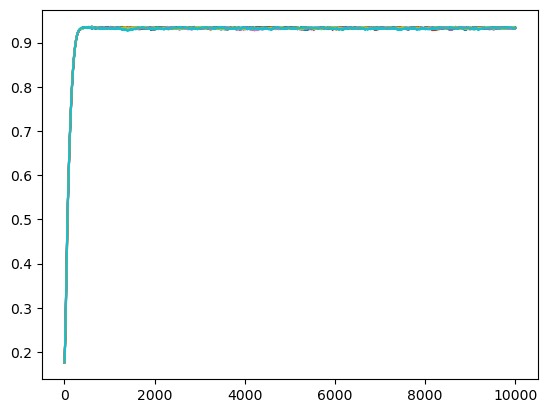

In [34]:
for i in range(10):
    plt.plot(esn.predict(np.ones(10000))[:, 0])

In [66]:
n = 60 - 1
datalen = len(time[n])
trainlen = datalen - 935
testlen = datalen - trainlen

training_timeseries = data[n][:trainlen]
test_timeseries_set = [data[n][trainlen:]]

spectral_radius_values = [0.5]
sparsity_values = [0.1]

esn, errors = optimal_esn(
    training_timeseries, 
    test_timeseries_set, 
    spectral_radius_values=spectral_radius_values, 
    sparsity_values=sparsity_values,
    n_reservoir=1500, 
    return_errors=True, 
    random_seed_starts_at=42, 
    trial_number=1
);

Spectral radius = 0.5
	Sparsity = 0.1
		Trial #42
			New best ESN. Error = 0.019526153996238922, spectral radius = 0.5, sparsity = 0.1


In [75]:
n = 66 - 1
datalen = len(time[n])
trainlen = datalen - 935
testlen = datalen - trainlen

training_timeseries = data[n][:trainlen]
test_timeseries_set = [data[n][trainlen:]]

spectral_radius_values = [0.5]
sparsity_values = [0.1]

esn1, errors = optimal_esn(
    training_timeseries, 
    test_timeseries_set, 
    spectral_radius_values=spectral_radius_values, 
    sparsity_values=sparsity_values,
    n_reservoir=1500, 
    return_errors=True, 
    random_seed_starts_at=42, 
    trial_number=1
);

Spectral radius = 0.5
	Sparsity = 0.1
		Trial #42
			New best ESN. Error = 0.2560119163931381, spectral radius = 0.5, sparsity = 0.1


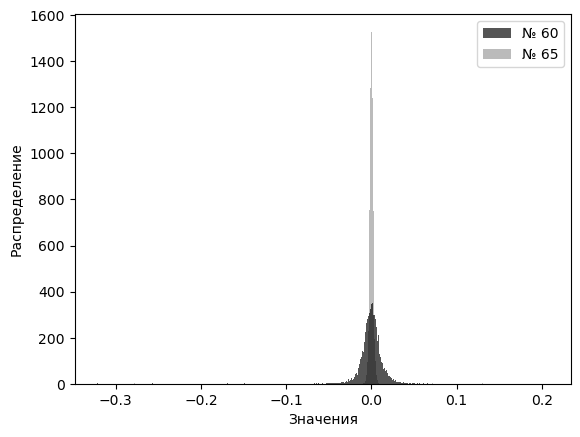

In [84]:
h = esn.W_out.reshape(-1)
h1 = esn1.W_out.reshape(-1)
h_min = np.min(h)
h_max = np.max(h)


plt.hist(h, bins=np.linspace(h_min, h_max, 1000), color='#000000aa', label='№ 60');
plt.hist(h1, bins=np.linspace(h_min, h_max, 1000), color='#00000044', label='№ 65');

plt.xlabel('Значения')
plt.ylabel('Распределение')
plt.legend()



In [54]:
esn.lastoutput

array([ 0.17683635, -0.07969448,  0.04985469,  0.06973422, -0.05100336,
        0.11402163, -0.01718572,  0.01653064, -0.08782847])